In [1]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv("Depression.csv")

In [10]:
df.head()

,Sr.no,People,Insomnia,Anxiety,frustration,Output
0,1,Aditya,7,5,3,6
1,2,Jayesh,4,6,8,6
2,3,Dhiraj,8,6,5,7
3,4,Sushant,2,1,4,3
4,5,Rhea,1,1,2,2


In [13]:
X=df[['Insomnia','Anxiety','frustration']]
Y=df['Output']

In [14]:
print(df.head())
train_data=df.sample(frac=0.8)

test_data=df.drop(train_data.index)

print(train_data.shape)
print(test_data.shape)


   Sr.no   People  Insomnia  Anxiety  frustration  Output
0      1   Aditya         7        5            3       6
1      2   Jayesh         4        6            8       6
2      3   Dhiraj         8        6            5       7
3      4  Sushant         2        1            4       3
4      5     Rhea         1        1            2       2
(40, 6)
(10, 6)


In [20]:
train_data=train_data.drop(labels='Sr.no',axis=1)

In [24]:
test_data=test_data.drop(labels='People',axis=1)

In [31]:
train_tar=train_data.pop('Output')
train_data.head()

,Insomnia,Anxiety,frustration
35,9,10,10
26,4,2,3
11,1,7,7
31,6,5,4
20,2,2,9


In [33]:
test_tar=test_data.pop("Output")
test_data.head()

,Insomnia,Anxiety,frustration
4,1,1,2
7,7,2,6
12,9,9,2
17,6,5,2
21,5,5,5


In [26]:
mf = [[['gaussmf',{'mean':np.mean(np.arange(0,5)),
                   'sigma':np.std(np.arange(0,5))}],
       ['gaussmf',{'mean':np.mean(np.arange(3,7)),              
                   'sigma':np.std(np.arange(3,7))}],
       ['gaussmf',{'mean':np.mean(np.arange(6,10)),
                   'sigma':np.std(np.arange(6,10))}]],
      
      [['gaussmf',{'mean':np.mean(np.arange(0,5)),
                   'sigma':np.std(np.arange(0,5))}],
       ['gaussmf',{'mean':np.mean(np.arange(3,7)),              
                   'sigma':np.std(np.arange(3,7))}],
       ['gaussmf',{'mean':np.mean(np.arange(6,10)),
                   'sigma':np.std(np.arange(6,10))}]],
      
      [['gaussmf',{'mean':np.mean(np.arange(0,5)),
                   'sigma':np.std(np.arange(0,5))}],
       ['gaussmf',{'mean':np.mean(np.arange(3,7)),              
                   'sigma':np.std(np.arange(3,7))}],
       ['gaussmf',{'mean':np.mean(np.arange(6,10)),
                   'sigma':np.std(np.arange(6,10))}]]]

In [27]:
from membership import membershipfunction
mfc = membershipfunction.MemFuncs(mf)

In [34]:
import anfis
anf = anfis.ANFIS(train_data,train_tar, mfc)

In [35]:
predict_train=anf.trainHybridJangOffLine(epochs=30)

current error:  0.0055958311465859525
current error:  0.005565610927183192
current error:  0.005535824228628929
current error:  0.005506450179162361
current error:  0.005474580176680116
current error:  0.005440030824796968
current error:  0.00540260785470892
current error:  0.005362105165343974
current error:  0.005318303616549306
current error:  0.00527096929450022
current error:  0.005219851225329461
current error:  0.005164678351438554
current error:  0.005105155479348075
current error:  0.005040958278784827
current error:  0.004971727038609878
current error:  0.004897059755689002
current error:  0.004816505122105996
current error:  0.0047295579272261055
current error:  0.004635660649430872
current error:  0.0045342191727406125
current error:  0.004424644649578485
current error:  0.004306439430926791
current error:  0.004179347507861478
current error:  0.004043585443436385
current error:  0.0039001490092128994
current error:  0.003751154415939141
current error:  0.003600141552606931

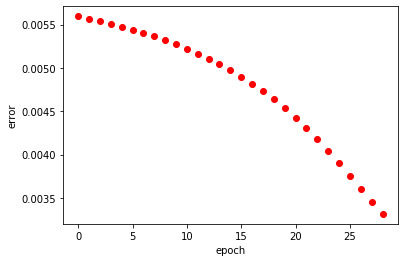

In [37]:
anf.plotErrors()

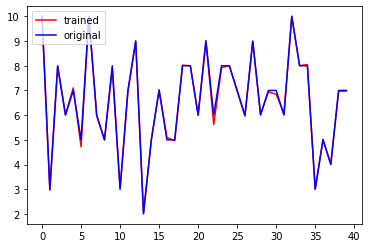

In [38]:
anf.plotResults()

In [41]:
predict_train

array([[10.00317823],
       [ 2.95484688],
       [ 7.96968901],
       [ 6.02320022],
       [ 7.09848333],
       [ 4.71915933],
       [ 9.99977387],
       [ 5.98789091],
       [ 4.99520083],
       [ 7.87322111],
       [ 3.02031887],
       [ 6.9231497 ],
       [ 8.99942712],
       [ 2.02722619],
       [ 4.97875675],
       [ 7.03542698],
       [ 5.09621378],
       [ 4.96265533],
       [ 8.0216815 ],
       [ 7.99814367],
       [ 5.99805486],
       [ 9.00749616],
       [ 5.62180619],
       [ 7.91739898],
       [ 8.00175058],
       [ 6.97765505],
       [ 5.95470824],
       [ 8.985685  ],
       [ 6.04039147],
       [ 6.94026008],
       [ 6.84666705],
       [ 6.0695192 ],
       [ 9.99877007],
       [ 8.00229021],
       [ 8.04429179],
       [ 3.00207741],
       [ 5.02003139],
       [ 4.02283644],
       [ 6.96988292],
       [ 6.97429047]])

In [42]:
train_data

,Insomnia,Anxiety,frustration
35,9,10,10
26,4,2,3
11,1,7,7
31,6,5,4
20,2,2,9
14,3,2,6
16,8,10,10
38,2,5,8
15,2,1,5
19,4,3,8
